# enlopy
http://enlopy.readthedocs.io/en/latest/

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2
pd.options.display.float_format = '{:.4g}'.format

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

(12,)

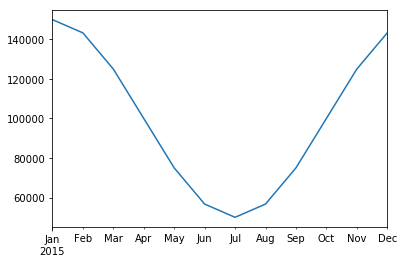

In [31]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.shape
ML.plot()

Create normalized random daily load for a working and non-working day

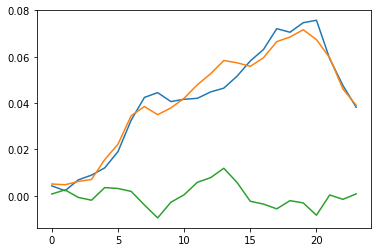

In [7]:
DWL =  el.gen_daily_stoch_el() #daily load working

DNWL = el.gen_daily_stoch_el() #daily load non working

x = DWL - DNWL

plt.plot(DNWL)
plt.plot(DWL)
plt.plot(x)

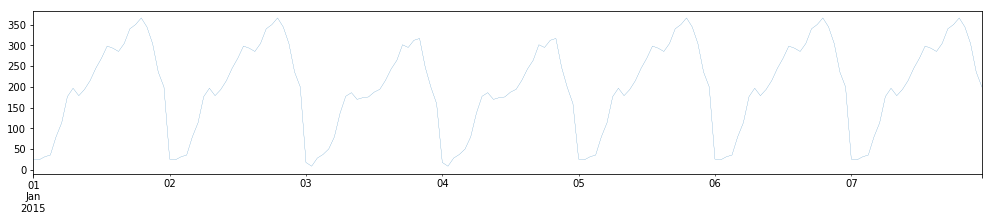

In [12]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name = 'House1'
#Load1.plot(figsize=(17,3), linewidth =.2, grid = False);
Load1.iloc[0:24*7].plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [32]:
el.disag_upsample(ML, DWL, to_offset='D')

ValueError: Wrong number of items passed 24, placement implies 1

In [13]:
print('error = {:.2f}'.format(Load1.sum() - ML.sum()))

error = 0.00


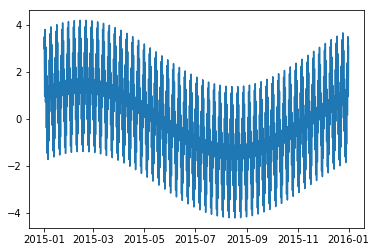

In [4]:
plt.plot(el.gen_load_sinus(1,1,1,1,1,1))

## Reshape (days - hours) and plot heatmap 

In [14]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,738.8,706.3,615.7,494.3,367.7,280.2,247.4,278,370.7,492.6,614.8,709.1
1,621.1,594.9,517.6,419.6,304.8,237.9,210.8,230.4,314.7,414.1,514.7,604.2
2,958.6,915.4,798.8,637.7,480.8,361.5,318.6,363.5,478.2,639.1,799.6,913
3,1131,1079,942.4,749.9,569.6,425.2,374.2,430.6,562.4,753.9,944.5,1073
4,2211,2114,1842,1482,1098,840,742.2,829.7,1111,1474,1838,2127
5,3221,3079,2684,2154,1604,1221,1078,1212,1616,2147,2681,3091
6,5117,4889,4264,3415,2554,1936,1708,1931,2561,3411,4262,4896
7,5928,5661,4940,3943,2973,2236,1970,2247,2958,3952,4944,5647
8,5611,5355,4676,3720,2827,2109,1856,2137,2790,3741,4686,5321


In [ ]:
el.plot_heatmap(Load1)

In [ ]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

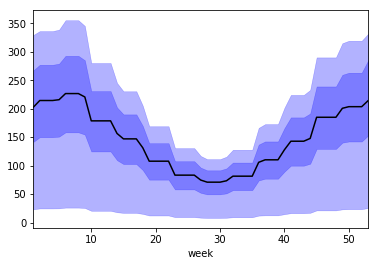

In [15]:
el.plot_percentiles(Load1, x='week', zz='hour')

In [ ]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

In [ ]:
el.plot_3d(Load1, bins=50, palette='inferno')

In [ ]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

In [ ]:
el.plot_boxplot(Load1, by='day')

### Rugplot

In [ ]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [ ]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

In [ ]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

## Archetypes

In [42]:
type(Load1)
Load1.shape
Load1.iloc[0:10]

pandas.core.series.Series

(8760,)

2015-01-01 00:00:00   26.17
2015-01-01 01:00:00   24.45
2015-01-01 02:00:00    31.8
2015-01-01 03:00:00   36.11
2015-01-01 04:00:00   79.86
2015-01-01 05:00:00   113.8
2015-01-01 06:00:00   176.7
2015-01-01 07:00:00   196.8
2015-01-01 08:00:00   178.9
2015-01-01 09:00:00   193.7
Freq: H, Name: House1, dtype: float64

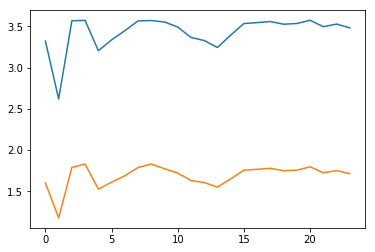

In [16]:
plt.plot(el.get_load_archetypes(Load1,2));

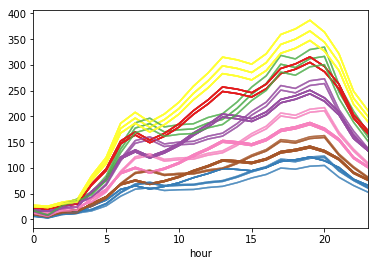

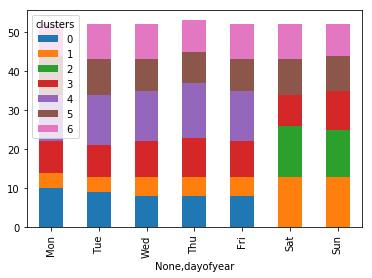

In [33]:
el.get_load_archetypes(Load1, 7, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [ ]:
el.get_LDC(Load1)

In [ ]:
el.plot_LDC(Load1, x_norm=False)

In [ ]:
el.plot_LDC(Load1, y_norm=True, color='Orange')

In [ ]:
el.plot_LDC(Load1, zoom_peak=True)

In [ ]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

In [ ]:
el.plot_LDC(df_many[['House1', 'House2']],zoom_peak=True)

# Add noise to a load

In [ ]:
Load1_noise = el.add_noise(Load1, 3, 100) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

In [ ]:
Load1_noise.iloc[0:100].plot()
Load1.iloc[0:100].plot()

In [ ]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

## Gather statistics

In [ ]:
el.get_load_stats(Load1)

We can also check the statistics per defined time period. Example for month ('m'):

In [ ]:
el.get_load_stats(Load1, per='m') 

## Load Shifting

The following function performs load shifting  (or peak shaving) from peak to off-peak timesteps based on given specifications, percentage of peak reduction and percentage of hours per month to peak.

In [ ]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

In [ ]:
Load1[0:100].plot()
Load1_DR[0:100].plot()

In [ ]:
el.get_load_stats(Load1)

As shown below it is less peaky as expected

In [ ]:
el.get_load_stats(Load1_DR)

In [ ]:
el.plot_LDC(Load1_DR, color='g')
el.plot_LDC(Load1)

## Sample new loads from load duration curve

In [ ]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

In [ ]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')